# Feature Extraction

In [66]:
import numpy as np
from numpy.linalg import norm
import seaborn as sns
import os
from tqdm.notebook import tqdm
import pickle
from PIL import Image
from pyparsing import col
# import streamlit as st
import numpy as np
from numpy.linalg import norm
import pickle
from sklearn.neighbors import NearestNeighbors
import cv2
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input

In [2]:
def feature_extractor(image_path,my_model):
    img = image.load_img(image_path,target_size=(224,224)) # Loading the image
    img_array = image.img_to_array(img) # Converting into a numpy array
    expanded_image_array = np.expand_dims(img_array,axis=0) # Expanding the dimention of the image
    preprocessed_img = preprocess_input(expanded_image_array) # Preprocesing of the images.
    outcome = my_model.predict(preprocessed_img).flatten() # Flating the preproess into 1D
    normalized_outcome = outcome / norm(outcome) # Normalizing the ourcome [sum(x[i])/sqrt(x)]
    return normalized_outcome

In [10]:
datasets_directory = "../input/fashion-product-images-small/images/"

In [11]:
filenames = []

for file in os.listdir(datasets_directory):
    filenames.append(os.path.join(datasets_directory, file))

pickle.dump(filenames,open('filenames.pkl','wb'))

In [6]:
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3)) # A model is that trained on imagenet

model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

2022-11-08 16:50:43.906633: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 16:50:44.021949: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 16:50:44.022708: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 16:50:44.023798: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

94781440/94765736 [==============================] - 3s 0us/step


In [14]:
feature_list = [] # A 2D list [[1st image feature->2048],[],[],[]]

for file in tqdm(filenames):
    feature_list.append(feature_extractor(file,model))


pickle.dump(feature_list,open('features.pkl','wb'))
# Datasets_size X 2048  

  0%|          | 0/44441 [00:00<?, ?it/s]

In [18]:
feature_list = np.array(pickle.load(open('./features.pkl', "rb")))
filenames_list = pickle.load(open('./filenames.pkl', 'rb'))

# The model

In [20]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [21]:
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

In [24]:
import pandas as pd

In [27]:
# df = pd.read_csv("../input/fashion-product-images-small/styles.csv")

In [34]:
def get_any_img():
    i = np.random.randint(10000,44000)
    return filenames[i]

In [36]:
get_any_img()

'../input/fashion-product-images-small/images/17933.jpg'

In [39]:
# Feature extraction for the test image
def feature_extractor (file_path,model):
    test_img = image.load_img(file_path, target_size=(224, 224))
    test_img_array = image.img_to_array(test_img)

    expanded_test_image_array = np.expand_dims(test_img_array, axis=0)
    preprocessed_test_img = preprocess_input(expanded_test_image_array)

    test_outcome = model.predict(preprocessed_test_img).flatten()
    normalized_test_outcome = test_outcome/norm(test_outcome)
    return normalized_test_outcome
# End of Feature extraction


def recomender(features,feature_list):
    all_neighbor = NearestNeighbors(
    n_neighbors=6, algorithm='auto', metric='euclidean')
    all_neighbor.fit(feature_list)

    distances, indexs = all_neighbor.kneighbors([features])

    return indexs

# Recomend Any

In [71]:
def main_App(inp_image,model):
    uploaded_features = feature_extractor(inp_image,model)
    return recomender(uploaded_features, feature_list)
    


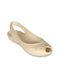

In [78]:
inp_image= get_any_img()
Image.open(inp_image)

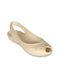

In [79]:
indx = main_App(inp_image,model)

Image.open(filenames[indx[0][0]])

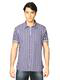

In [59]:

Image.open(filenames[indx[0][1]])